In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report


In [ ]:
df = pd.read_csv('/content/investment_dataset.csv')
df.head()

,year,growth,city,domain,invested,profit,risk_level,rating,good_investment
0,2016,14.94,Mumbai,E-commerce,13235029,2550823,Medium,3,1
1,2013,19.45,Pune,SaaS,5859462,1154488,Medium,4,1
2,2022,18.14,Pune,HealthTech,8338941,1729151,Medium,4,1
3,2024,29.22,Mumbai,AI/ML,17955282,7721505,Low,4,1
4,2020,14.52,Mumbai,E-commerce,2377779,417724,Medium,3,1


In [ ]:
df.isna().sum()

,0
year,0
growth,0
city,0
domain,0
invested,0
profit,0
risk_level,0
rating,0
good_investment,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             1500 non-null   int64  
 1   growth           1500 non-null   float64
 2   city             1500 non-null   object 
 3   domain           1500 non-null   object 
 4   invested         1500 non-null   int64  
 5   profit           1500 non-null   int64  
 6   risk_level       1500 non-null   object 
 7   rating           1500 non-null   int64  
 8   good_investment  1500 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 105.6+ KB


<Figure size 1000x500 with 0 Axes>

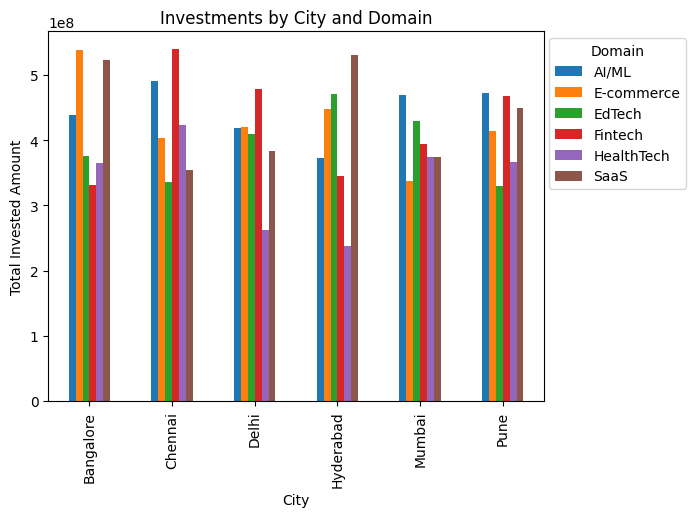

In [ ]:
pivot_cd = df.pivot_table(index='city',columns='domain',values='invested',aggfunc='sum')

plt.figure(figsize=(10, 5))
pivot_cd.plot(kind='bar')
plt.xlabel("City")
plt.ylabel("Total Invested Amount")
plt.title("Investments by City and Domain")
plt.legend(title="Domain", loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in ['city', 'domain', 'risk_level']:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,year,growth,city,domain,invested,profit,risk_level,rating,good_investment
0,2016,14.94,4,1,13235029,2550823,2,3,1
1,2013,19.45,5,5,5859462,1154488,2,4,1
2,2022,18.14,5,4,8338941,1729151,2,4,1
3,2024,29.22,4,0,17955282,7721505,1,4,1
4,2020,14.52,4,1,2377779,417724,2,3,1


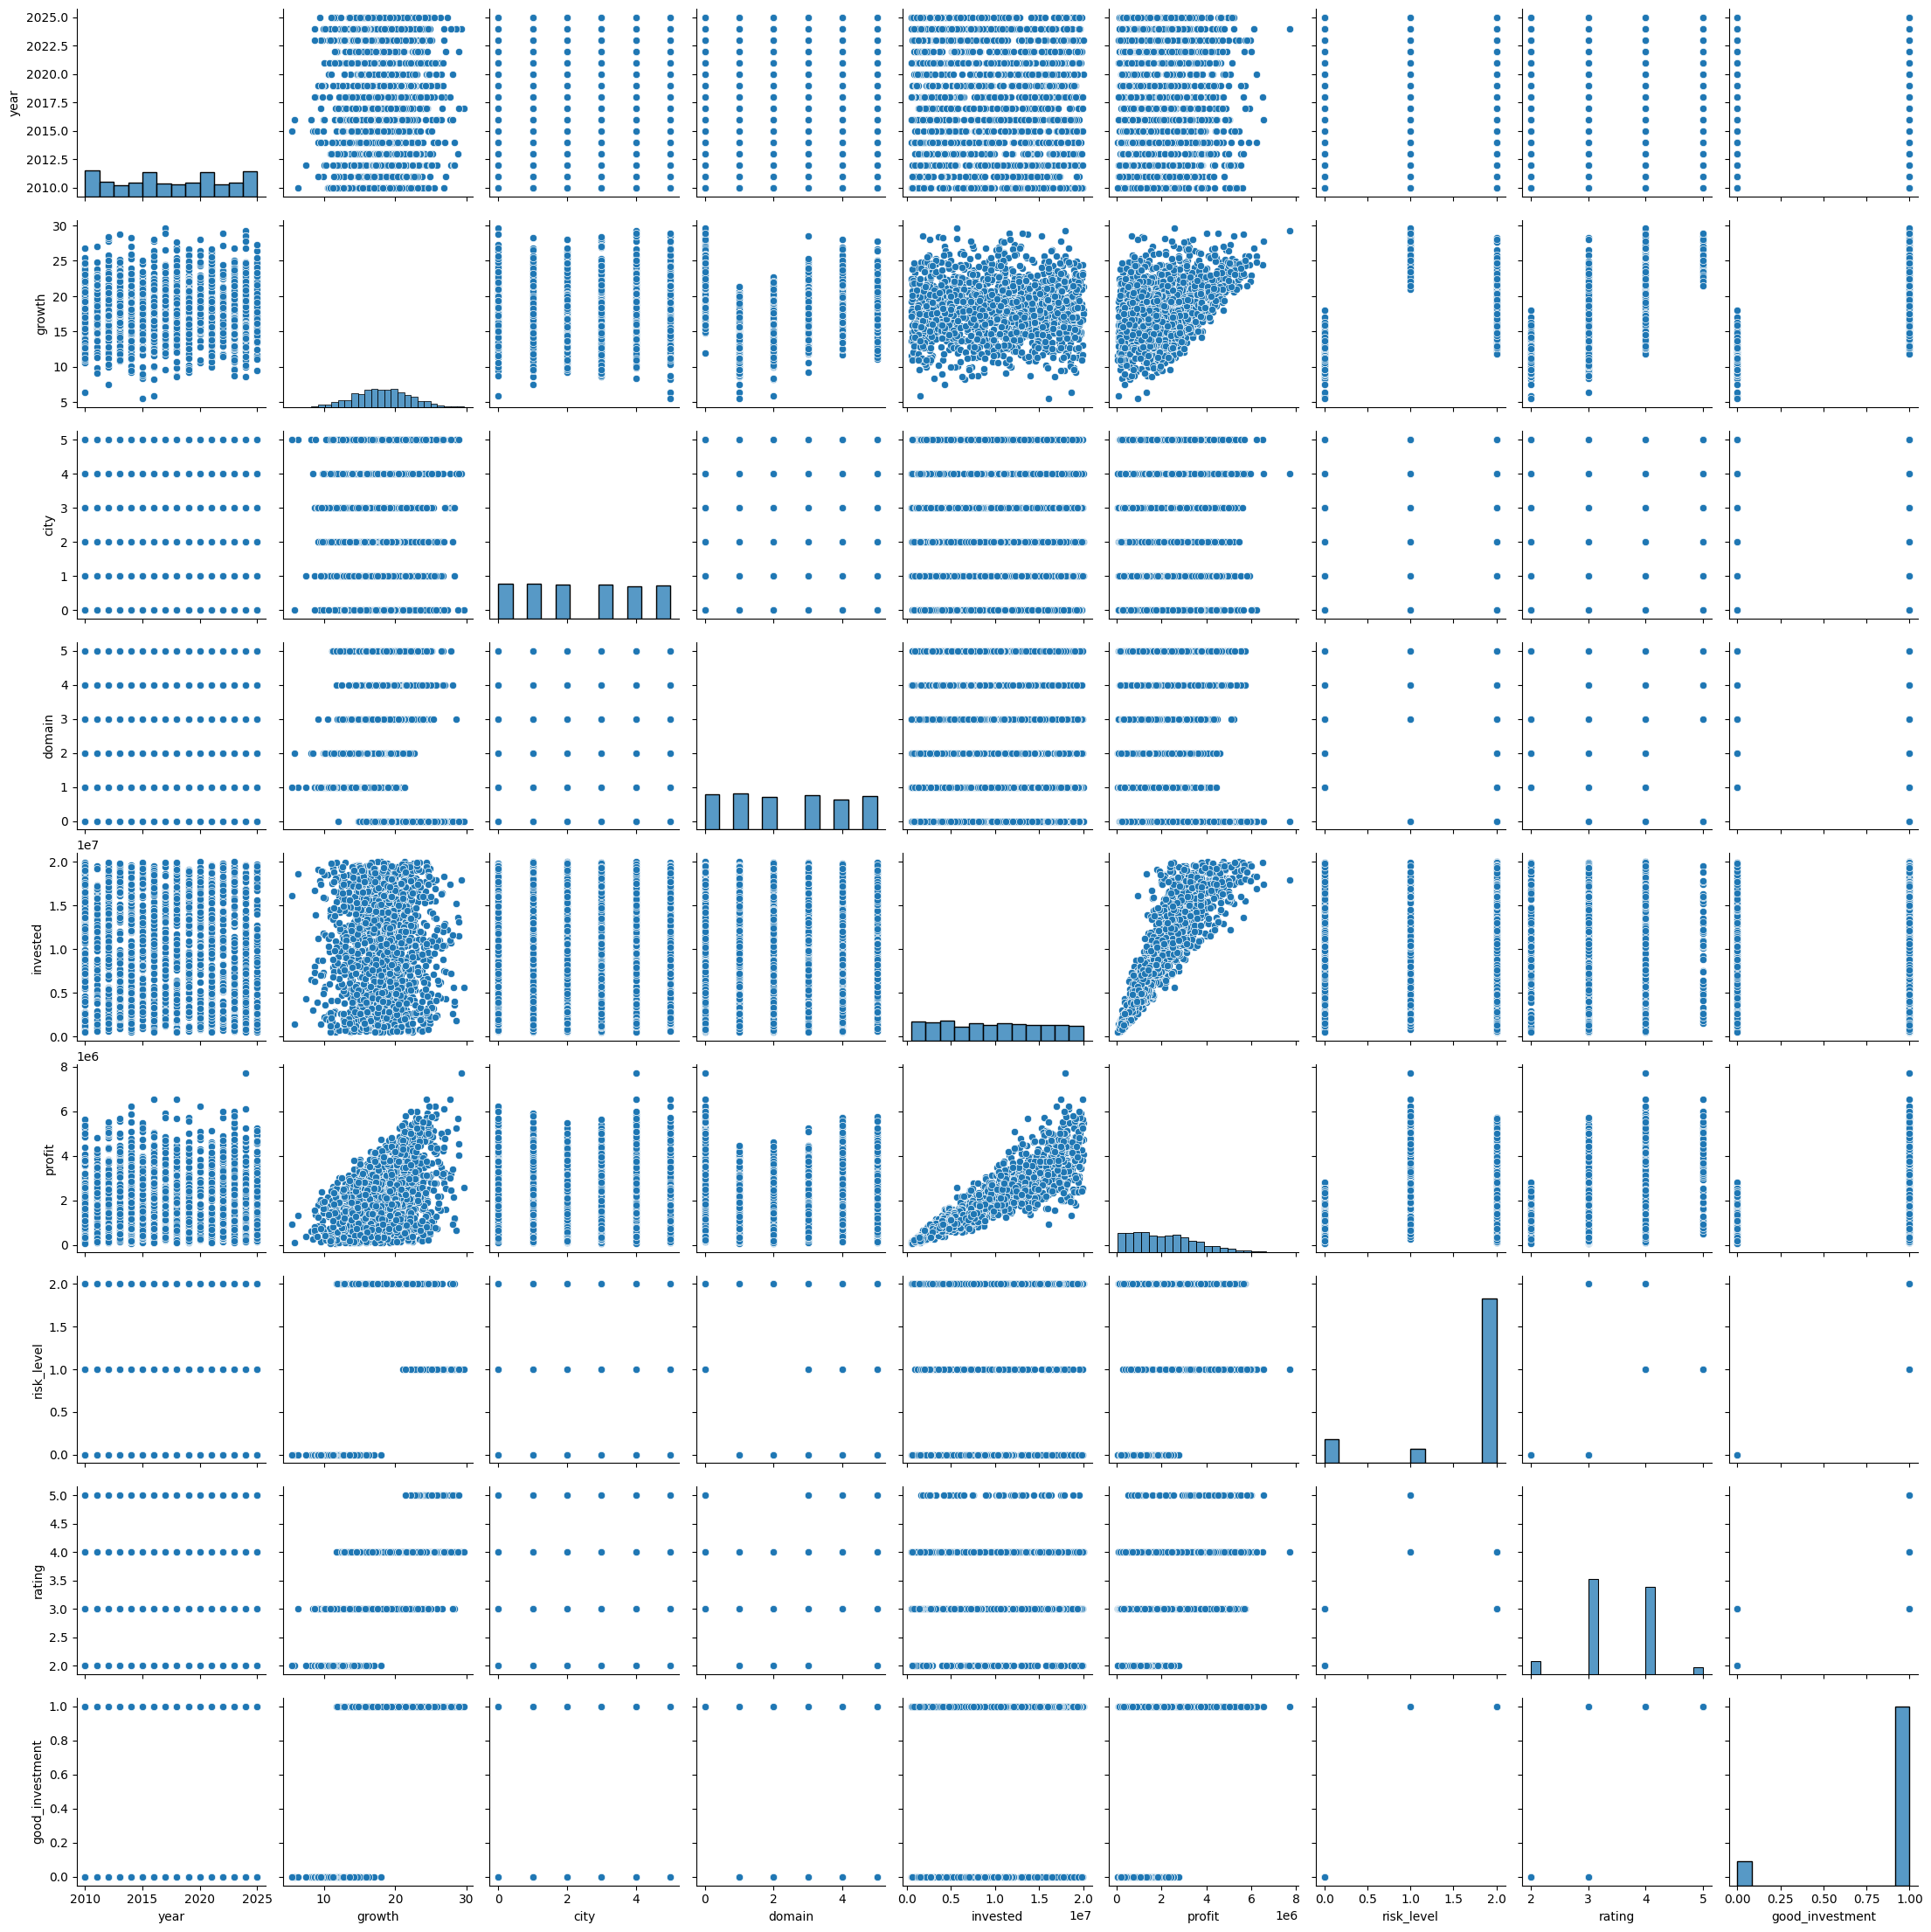

In [ ]:
sns.pairplot(df)

<Axes: >

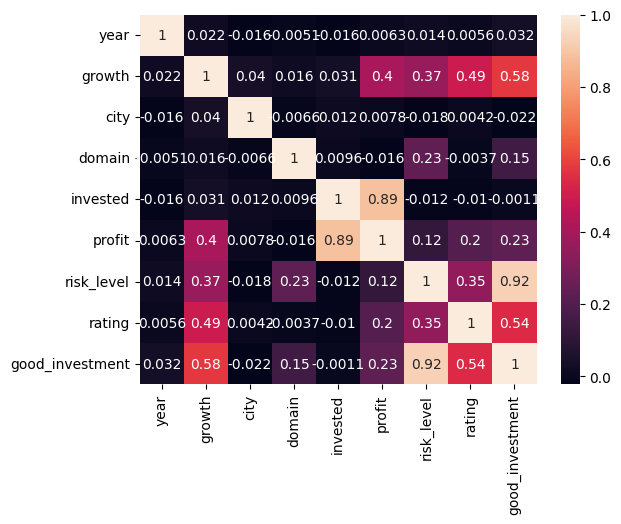

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
x = df.drop(columns=['good_investment', 'risk_level'],axis=1)
y = df['good_investment']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1200, 7), (300, 7), (1200,), (300,))

In [ ]:
rr = RandomForestClassifier()
rr.fit(x_train, y_train)
y_pred = rr.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        33
           1       1.00      0.99      0.99       267

    accuracy                           0.99       300
   macro avg       0.97      0.98      0.97       300
weighted avg       0.99      0.99      0.99       300



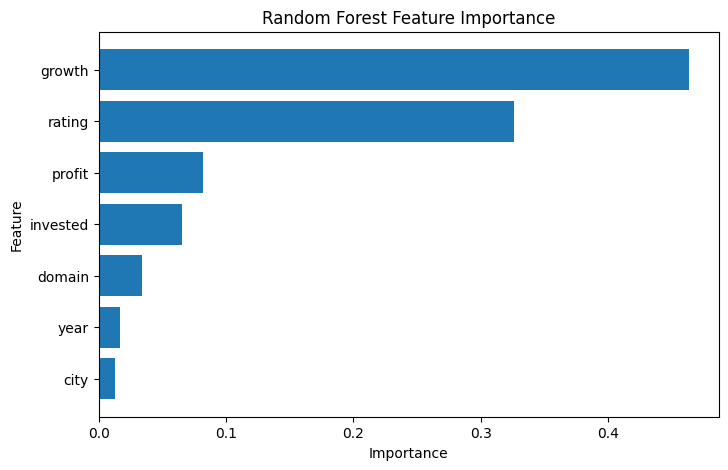

    Feature  Importance
1    growth    0.463418
6    rating    0.325840
5    profit    0.081554
4  invested    0.065111
3    domain    0.034217
0      year    0.017097
2      city    0.012764


In [ ]:
importance = rr.feature_importances_
feature_imp = pd.DataFrame({'Feature': x.columns, 'Importance': importance})
feature_imp = feature_imp.sort_values('Importance', ascending=False)

plt.figure(figsize=(8,5))
plt.barh(feature_imp['Feature'], feature_imp['Importance'])
plt.gca().invert_yaxis()
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
print(feature_imp)

In [ ]:
print(" Enter Investment Details")
year = int(input("Year: "))
growth = float(input("Growth (%): "))
print("\nSelect City:")
print("3 - Hyderabad")
print("0 - Bangalore")
print("1 - Chennai")
print("6 - Mumbai")
print("2 - Delhi")
print("5 - Pune")
city = int(input("Enter City Code (use one of the above numbers): "))
print("\nSelect Domain:")
print("1 - E-commerce")
print("2 - EdTech")
print("3 - Fintech")
print("4 - HealthTech")
print("5 - SaaS")
print("0 - AI/ML")
domain = int(input("Enter Domain Code (use one of the above numbers): "))
invested = float(input("Invested Amount: "))
profit = float(input("Expected Profit Amount: "))
rating = int(input("Rating (1-5): "))
sample = x.iloc[[0]].copy()
sample.loc[sample.index[0], 'year'] = year
sample.loc[sample.index[0], 'growth'] = growth
sample.loc[sample.index[0], 'city'] = city
sample.loc[sample.index[0], 'domain'] = domain
sample.loc[sample.index[0], 'invested'] = invested
sample.loc[sample.index[0], 'profit'] = profit
sample.loc[sample.index[0], 'rating'] = rating

result = rr.predict(sample)[0]
if result == 1:
    print(" Good Investment")
else:
    print(" Not Good Investment")

 Enter Investment Details
Year: 2026
Growth (%): 5

Select City:
3 - Hyderabad
0 - Bangalore
1 - Chennai
6 - Mumbai
2 - Delhi
5 - Pune
Enter City Code (use one of the above numbers): 3

Select Domain:
1 - E-commerce
2 - EdTech
3 - Fintech
4 - HealthTech
5 - SaaS
0 - AI/ML
Enter Domain Code (use one of the above numbers): 2
Invested Amount: 1000000
Expected Profit Amount: 100000
Rating (1-5): 3
 Not Good Investment
